In [359]:
import math
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy as np
import glob

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
# sudo apt-get install texlive-latex-base texlive-fonts-recommended texlive-fonts-extra texlive-latex-extra
fontsize = 40
markersize = 700

In [297]:
def replace_graph_names(df):
    df["Input Graph"] = df["Input Graph"].str.replace("com-", "", regex=True)\
                                    .str.replace(".gbbs.txt", "", regex=True)\
                                    .str.replace(".bin", "", regex=True)\
                                    .str.replace(".ungraph.txt", "", regex=True)\
                                    .str.replace(".graph.txt", "", regex=True)
    
    df["Input Graph"] = df["Input Graph"].str.replace("amazon", "AM", regex=True)\
                                    .str.replace("youtube", "YT", regex=True)\
                                    .str.replace("dblp", "DB", regex=True)\
                                    .str.replace("lj", "LJ", regex=True)\
                                    .str.replace("orkut", "OK", regex=True)\
                                    .str.replace("friendster", "FS", regex=True)
    
    df["Clusterer Name"] = df["Clusterer Name"].str.replace("Scan", "SCAN", regex=True)\
                                    .str.replace("Tectonic", "TECTONIC", regex=True)\
                                    .str.replace("Hac", "HAC", regex=True)\
                                    .str.replace("Clusterer", "", regex=True)\
                                    .str.replace("Parallel", "", regex=True)\
                                    .str.replace("Optimization", "", regex=True)
    
#     df["Clusterer Name"] = df["Clusterer Name"].str.replace("TigerGraph", "TG", regex=True)\
#                                     .str.replace("Neo4j", "NJ", regex=True)\
#                                     .str.replace("Louvain", "LV", regex=True)\
#                                     .str.replace("Leiden", "LD", regex=True)\
#                                     .str.replace("ModularityOptimization", "Mo", regex=True)\
#                                     .str.replace("Correlation", "Corr", regex=True)\
#                                     .str.replace("Modularity", "Mo", regex=True)\
#                                     .str.replace("NetworKit", "NK", regex=True)

In [298]:
base_addr = "/Users/sy/Desktop/MIT/clusterer/csv/"

In [385]:
csv_files = glob.glob(base_addr + "modularity_stats/*")
df = pd.concat([pd.read_csv(path, ) for path in csv_files])
df = df.fillna("[0.1]")
df['modularityObjective'] = df['modularityObjective'].str.strip('[]').astype(float)
df['correlationObjective'] = df['correlationObjective'].str.strip('[]').astype(float)

replace_graph_names(df)
df.reset_index(inplace=True)

graphs = df["Input Graph"].unique()
clusterers = df["Clusterer Name"].unique()


In [361]:
# sns.scatterplot(data=df[(df["Clusterer Name"]=="Correlation") & (df["Input Graph"]=="AM")],
#                x = "numberClusters", y = 'correlationObjective')
# plt.xscale("log")
# plt.yscale("symlog")

In [386]:
df[["Input Graph", "Clusterer Name", 
    'modularityObjective', "Config"]].groupby(['Input Graph', 'Clusterer Name'])['modularityObjective'].max()

Input Graph  Clusterer Name   
AM           Correlation          0.912687
             Modularity           0.926138
             Neo4jLeiden          0.925538
             Neo4jLouvain         0.926110
             Neo4jModularity      0.667432
             NetworKitLeiden      0.680386
             NetworKitPLM         0.926219
             TigerGraphLouvain    0.027761
DB           Correlation          0.810003
             Modularity           0.820495
             Neo4jLeiden          0.823021
             Neo4jLouvain         0.821111
             Neo4jModularity      0.579252
             NetworKitLeiden      0.601858
             NetworKitPLM         0.822136
             TigerGraphLouvain    0.041119
FS           Correlation          0.457307
             Modularity           0.912957
LJ           Correlation          0.686646
             Modularity           0.755035
             Neo4jLeiden          0.743583
             Neo4jLouvain         0.754733
             Neo4jModul

In [387]:
df.loc[4]

index                                                            4
Unnamed: 0                                                       4
Clusterer Name                                        Neo4jLouvain
Input Graph                                                     AM
Threads                                                          4
Config                             maxIterations: 10,maxLevels: 10
Round                                                            0
Cluster Time                                             14.160728
filename                /home/sy/mount-data/com-amazon.ungraph.txt
numberNodes                                               548552.0
numberClusters                                               223.0
clusterSizes_minimum                                          14.0
clusterSizes_maximum                                       12398.0
clusterSizes_mean                                      1501.627803
clusterSizes_total                                        3348

In [388]:
df[["Input Graph", "Clusterer Name", 
    'modularityObjective', "Config"]].groupby(['Input Graph', 'Clusterer Name'])['modularityObjective'].idxmax()

Input Graph  Clusterer Name   
AM           Correlation           229
             Modularity            604
             Neo4jLeiden            65
             Neo4jLouvain            4
             Neo4jModularity       154
             NetworKitLeiden      1391
             NetworKitPLM         1092
             TigerGraphLouvain     162
DB           Correlation           279
             Modularity            691
             Neo4jLeiden            98
             Neo4jLouvain            8
             Neo4jModularity       157
             NetworKitLeiden      1411
             NetworKitPLM         1194
             TigerGraphLouvain     164
FS           Correlation           436
             Modularity            956
LJ           Correlation           177
             Modularity            516
             Neo4jLeiden            32
             Neo4jLouvain            2
             Neo4jModularity       153
             NetworKitLeiden      1363
             NetworKitPLM        

In [392]:
# Group by Input Graph and Clusterer Name, then find the row with maximum modularityObjective
max_modularity_indices = df[["Input Graph", "Clusterer Name", 
    'modularityObjective', "Config"]].groupby(['Input Graph', 'Clusterer Name'])['modularityObjective'].idxmax()

result = df[["Input Graph", "Clusterer Name", 
    'modularityObjective', "Config"]].loc[max_modularity_indices]

# Extract rows with maximum modularityObjective
result_sorted = result.sort_values(by=['Input Graph', 'modularityObjective'], ascending=[True, False])
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
#                        'display.precision', 3,
                       ):
#     display(result_sorted[result_sorted["Input Graph"]=="LJ"] )
    display(result_sorted)

,Input Graph,Clusterer Name,modularityObjective,Config
1092,AM,NetworKitPLM,0.926219,"use_refine: True,gamma: 0.9201023981873934,max..."
604,AM,Modularity,0.926138,"resolution: 0.9201023981873934, correlation_co..."
4,AM,Neo4jLouvain,0.926110,"maxIterations: 10,maxLevels: 10"
65,AM,Neo4jLeiden,0.925538,"gamma: 0.9201023981873934,maxLevels: 20"
229,AM,Correlation,0.912687,"resolution: 0.0001,louvain_config: {num_iterat..."
1391,AM,NetworKitLeiden,0.680386,"gamma: 0.2139864107581439,iterations: 20"
154,AM,Neo4jModularity,0.667432,"maxIterations: 10,minCommunitySize: 2"
162,AM,TigerGraphLouvain,0.027761,maxIterations: 10
98,DB,Neo4jLeiden,0.823021,"gamma: 0.9201023981873934,maxLevels: 10"
1194,DB,NetworKitPLM,0.822136,"use_refine: False,gamma: 0.9201023981873934,ma..."


In [364]:
df_max = df[["Input Graph", "Clusterer Name", 
    'modularityObjective', "Config"]].groupby(["Input Graph", "Clusterer Name"]).max() #'correlationObjective', 

In [401]:
def plot_modularity_method(ax, objective, name, graph, df_sub):
    df_sub.reset_index(names=['Clusterer Name'], inplace=True)
#     df_melted = df_sub.melt(id_vars='Clusterer Name', var_name='Objective', value_name='Value')
    sns.barplot(x=objective, y="Clusterer Name", data=df_sub, orient='h', ax= ax, color="gray")
    ax.set_xlabel(name, fontsize = fontsize)
    ax.set_ylabel("")
    
    ax.set_title(f"{graph}", fontsize = fontsize)
    if objective == "correlationObjective":
        ax.set_xscale("symlog")
        ax.set_xlim(-1e2, 0)
#         if graph != "FS":
#             ax.set_xticks([-1e12, -1e10, -1e8, -1e6, -1e4, -1e2, 0])
    set_ax_ticks(ax)
    
    
def plot_modularity_methods_compare(objective, name):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(40, 16))
    axes_arr = axes.flatten()
    for i in range(len(graphs)):
        graph = graphs[i]
        df_sub = df_max.loc[graph]
        ax = axes_arr[i]
        plot_modularity_method(ax, objective, name, graph, df_sub)
    plt.subplots_adjust(wspace=0.7, hspace=0.5)  # Adjust the value as needed

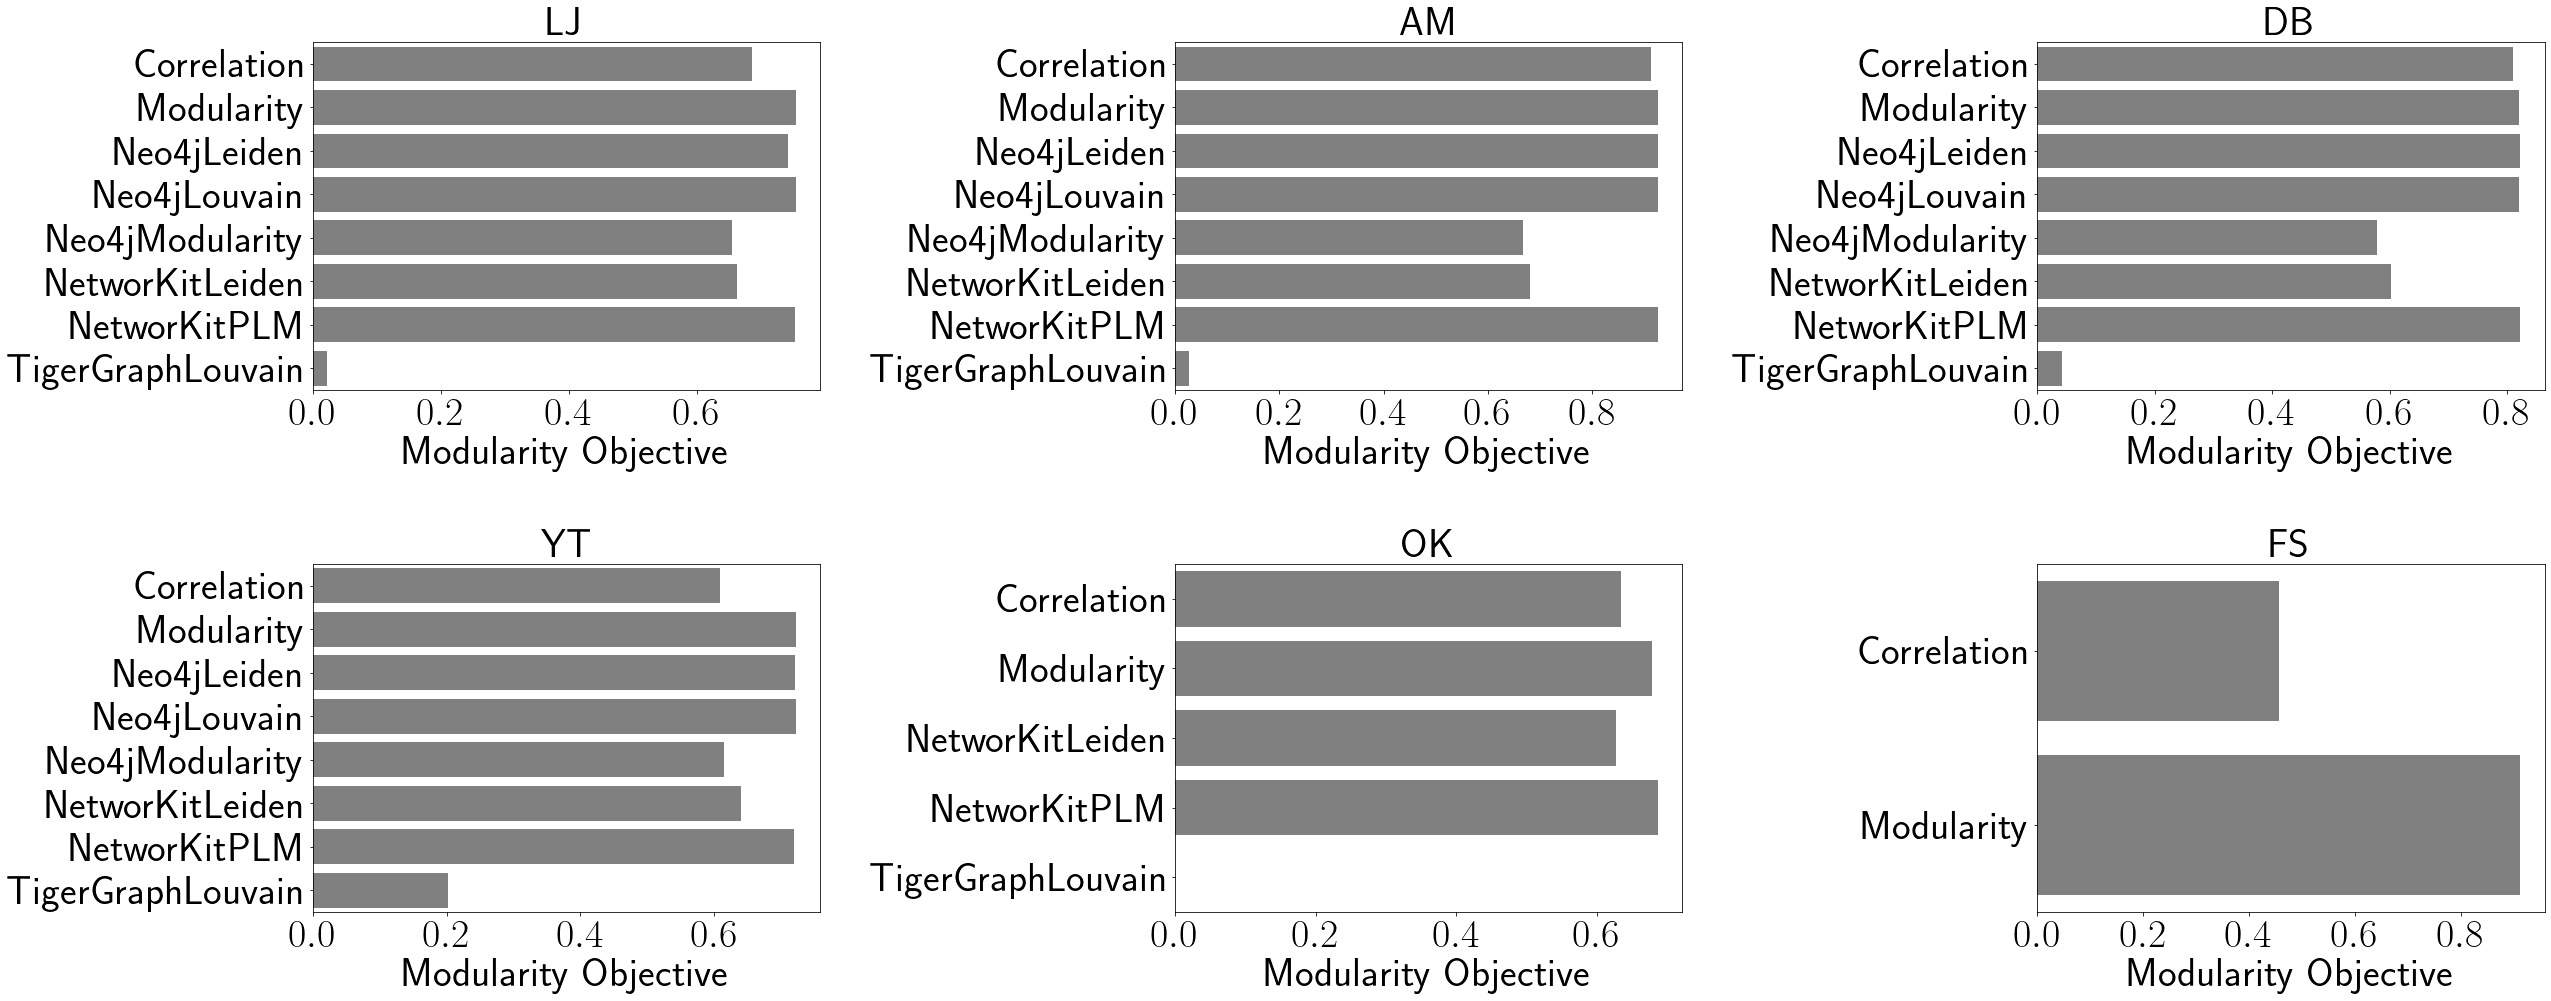

In [402]:
objective = "modularityObjective"
name = 'Modularity Objective'
plot_modularity_methods_compare(objective, name)

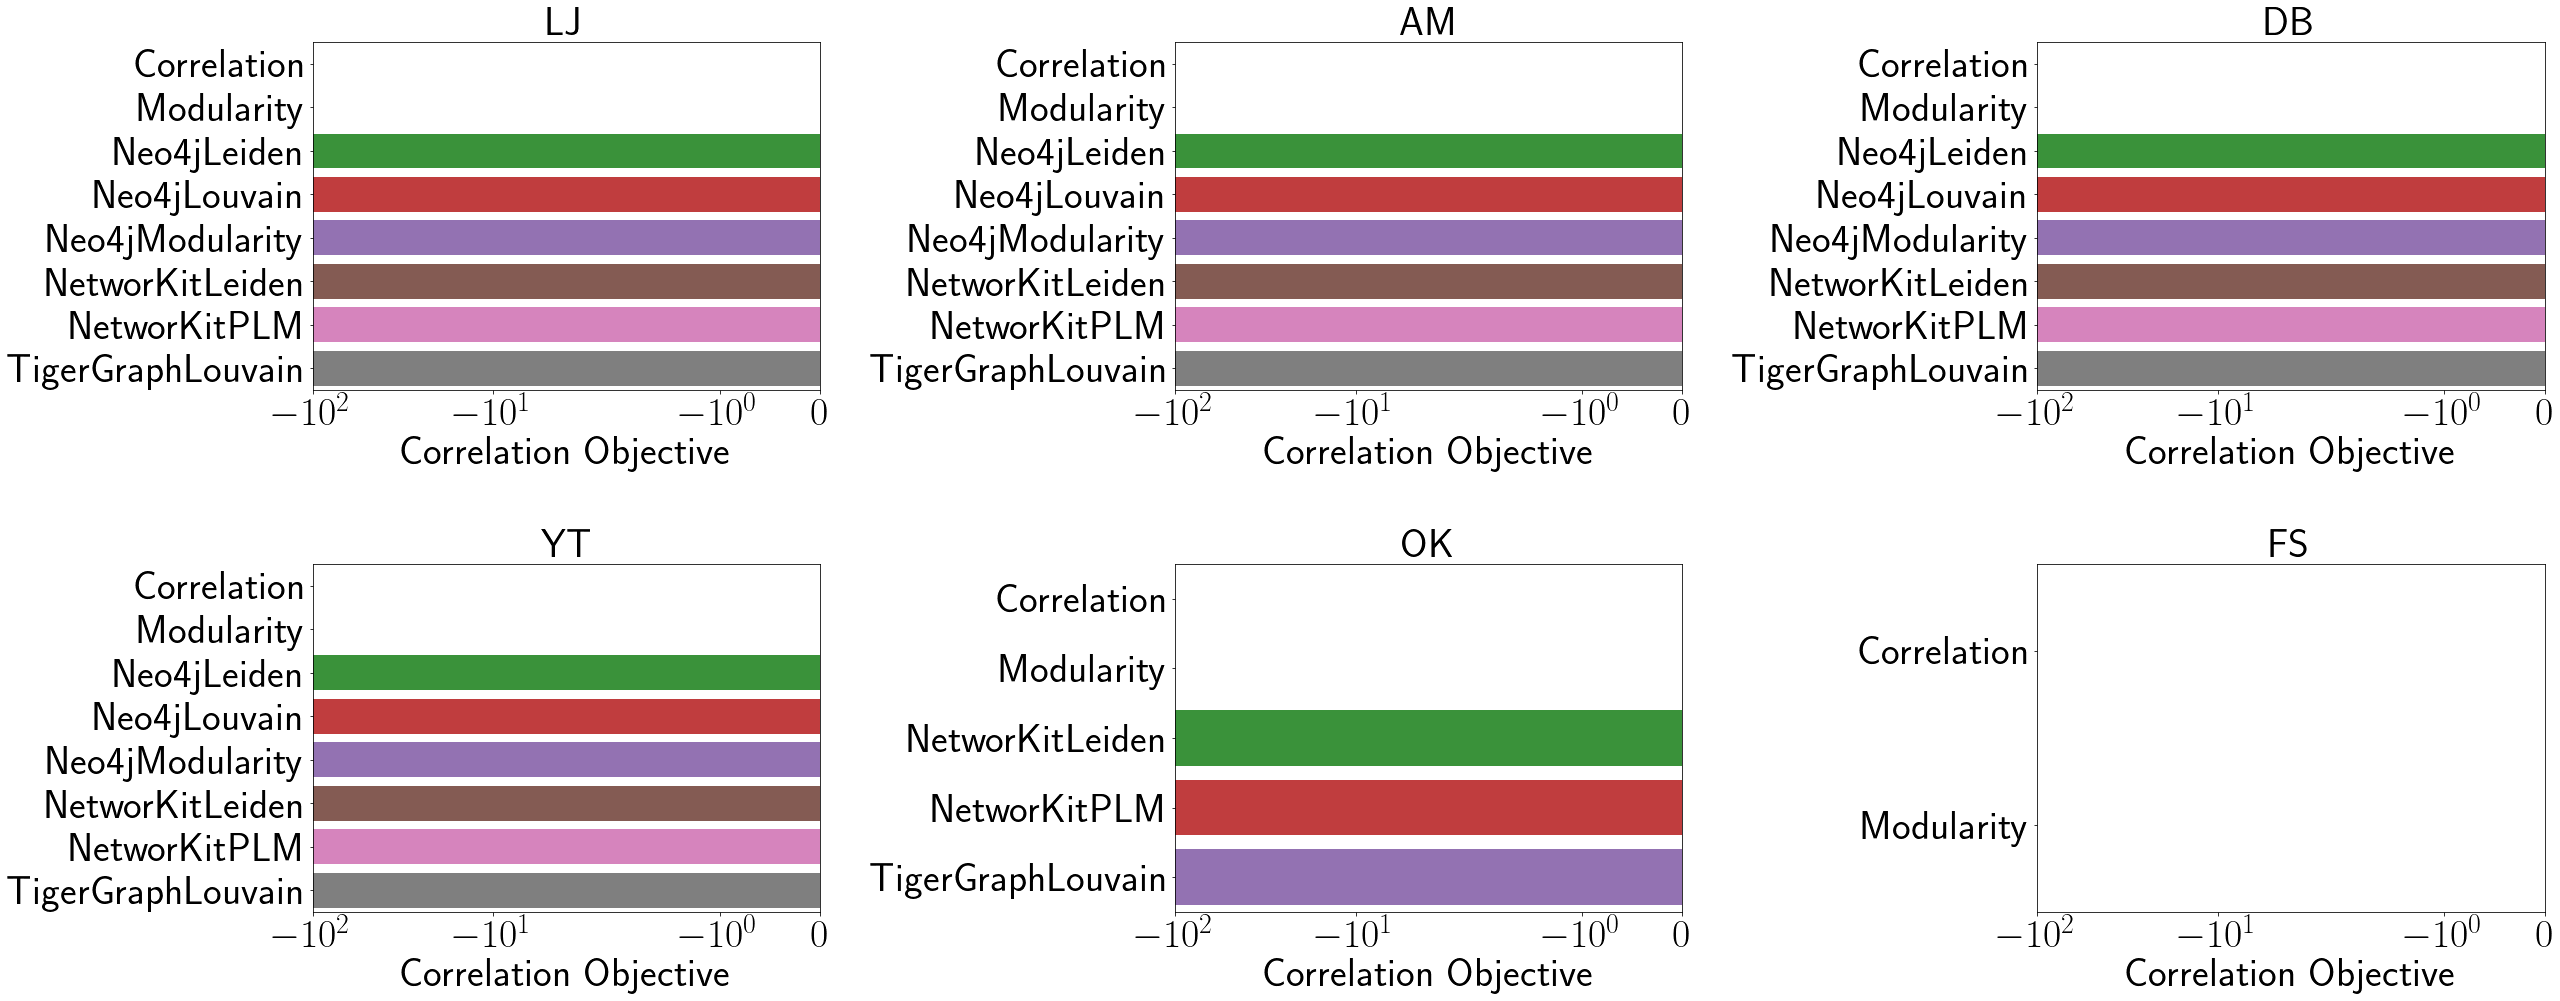

In [328]:
objective = "correlationObjective"
name = 'Correlation Objective'
plot_modularity_methods_compare(objective, name)

/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_37026/273707158.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axes_arr[i].set_yscale('log')
/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_37026/273707158.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axes_arr[i].set_yscale('log')
/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_37026/273707158.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axes_arr[i].set_yscale('log')
/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_37026/273707158.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axes_arr[i].set_yscale('log')
/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_37026/273707158.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axes_arr[i].set_yscale('log')


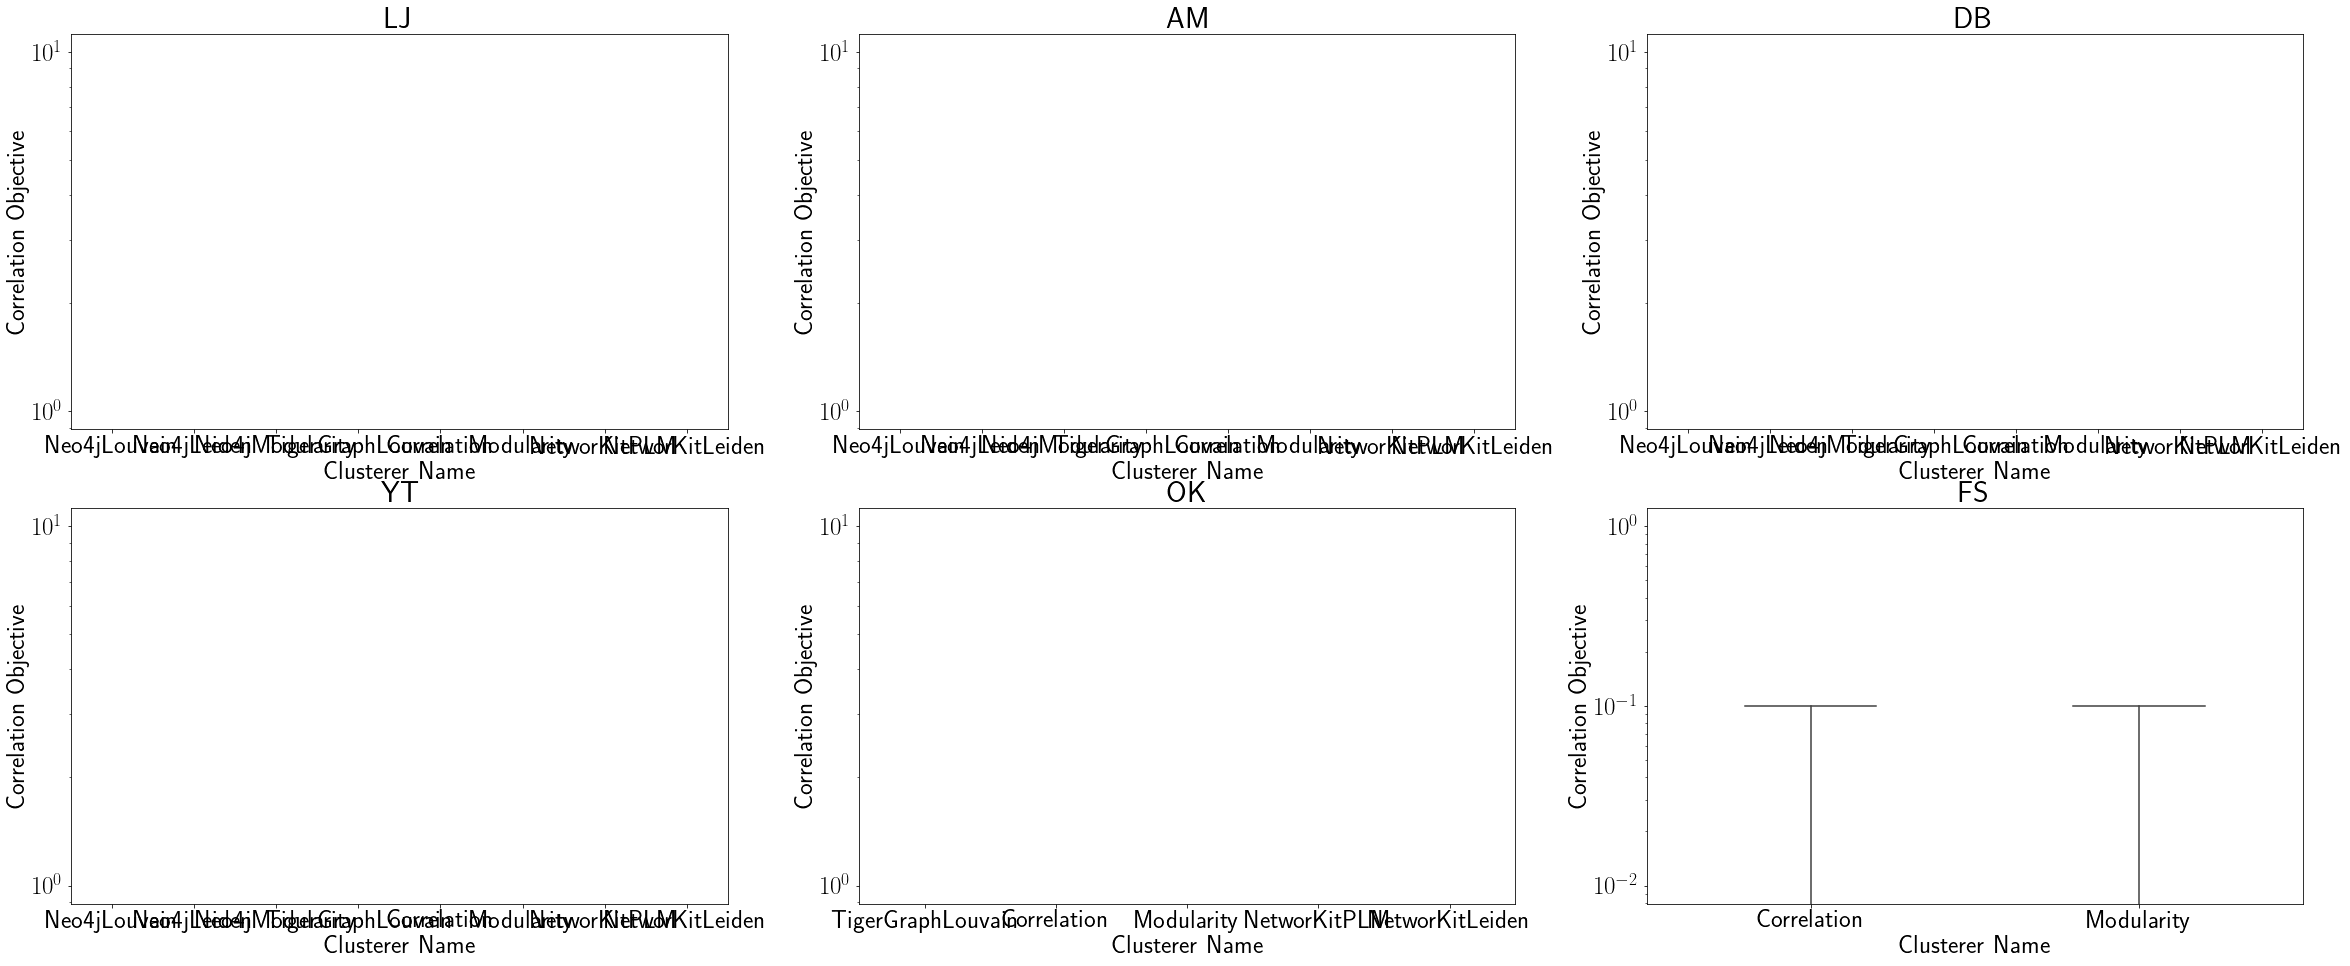

In [313]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(40, 16))
axes_arr = axes.flatten()
for i in range(len(graphs)):
    graph = graphs[i]
    df_sub = df[(df["Input Graph"]==graph) ] #& (df["Clusterer Name"].isin(["Corr", "Mo"]))
    sns.boxplot(data = df_sub, 
#              x = "Cluster Time", 
             x="Clusterer Name",
             y = 'correlationObjective',
             ax = axes_arr[i])
    axes_arr[i].set_title(f"{graph}")
    axes_arr[i].set_yscale('log')
    axes_arr[i].set_ylabel('Correlation Objective')    

## plot against f score

In [342]:
csv_files = glob.glob(base_addr + "modularity_stats/*")
df = pd.concat([pd.read_csv(path, ) for path in csv_files])
df = df.fillna("[0.1]")
df['modularityObjective'] = df['modularityObjective'].str.strip('[]').astype(float)
df['correlationObjective'] = 1 * df['correlationObjective'].str.strip('[]').astype(float)
replace_graph_names(df)
df = df[df["Clusterer Name"].isin(["Moularity", "Correlation" ])] #
graphs = df["Input Graph"].unique()


df2 = pd.read_csv(base_addr + "snap_results/stats_snap_mod.csv")[["Input Graph", 
                                                                 "Clusterer Name", "Config", 'fScore_mean']]
replace_graph_names(df2)
df2 = df2[df2["Clusterer Name"].isin(["Correlation", "Modularity"])]


df.set_index(["Input Graph", "Clusterer Name", "Config"], inplace=True)
df2.set_index(["Input Graph", "Clusterer Name", "Config"], inplace=True)

df_all = df.join(df2, on=["Input Graph", "Clusterer Name", "Config"], how="inner")

In [356]:
def set_ax_ticks(ax):
    for l in ax.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    for l in ax.xaxis.get_ticklabels():
        l.set_fontsize(fontsize)
        
def plot_ax(ax, xaxis, yaxis, xlabel, ylabel, df_sub, graph):
    sns.scatterplot(data = df_sub, 
         x=xaxis,
         y=yaxis,
         s = markersize, 
         ax = ax)
    ax.set_title(f"{graph}", fontsize = fontsize)
    if xaxis == 'correlationObjective':
        ax.set_xscale("symlog")  
        current_xlim = ax.get_xlim()
        ax.set_xlim(left=current_xlim[0], right=1)
        ax.set_xticks([-1e14, -1e12, -1e10, -1e8, -1e6, -1e4, -1e2, 0])
    ax.set_ylabel(ylabel, fontsize = fontsize)
    ax.set_xlabel(xlabel, fontsize = fontsize)
    set_ax_ticks(ax)
    
    
def plotObjectives(xaxis, yaxis, xlabel, ylabel):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(40, 16))
    axes_arr = axes.flatten()
    for i in range(len(graphs)):
        ax = axes_arr[i]
        graph = graphs[i]
        df_sub = df_all.loc[graph]
        plot_ax(ax, xaxis, yaxis, xlabel, ylabel, df_sub, graph)
                        
        
    plt.subplots_adjust(hspace=0.3)  # Adjust the value as needed


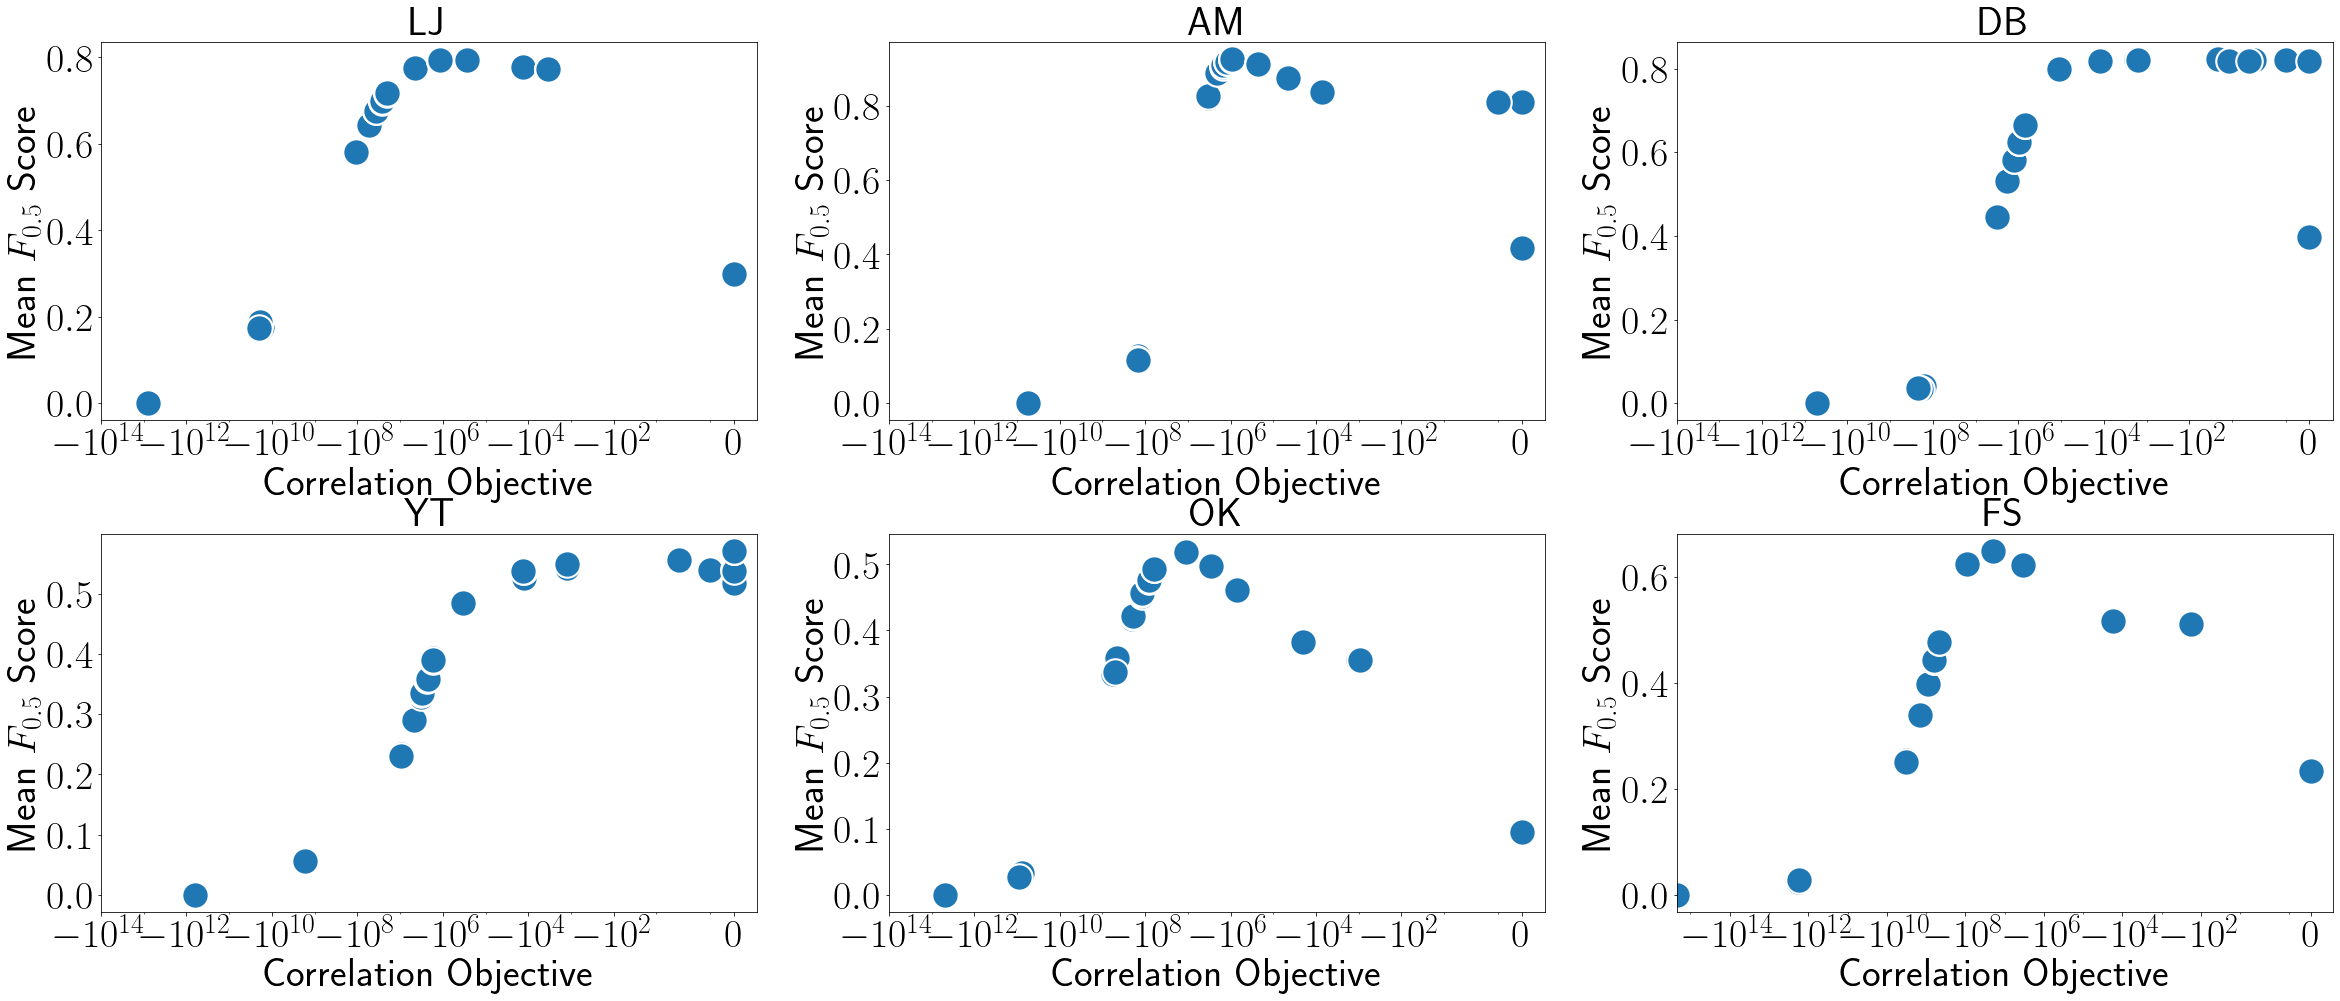

In [357]:
xaxis = 'correlationObjective'
yaxis = "fScore_mean"
plotObjectives(xaxis, yaxis, "Correlation Objective", "Mean $F_{0.5}$ Score")
plt.savefig("../results/objective_corr_f.pdf", bbox_inches='tight')

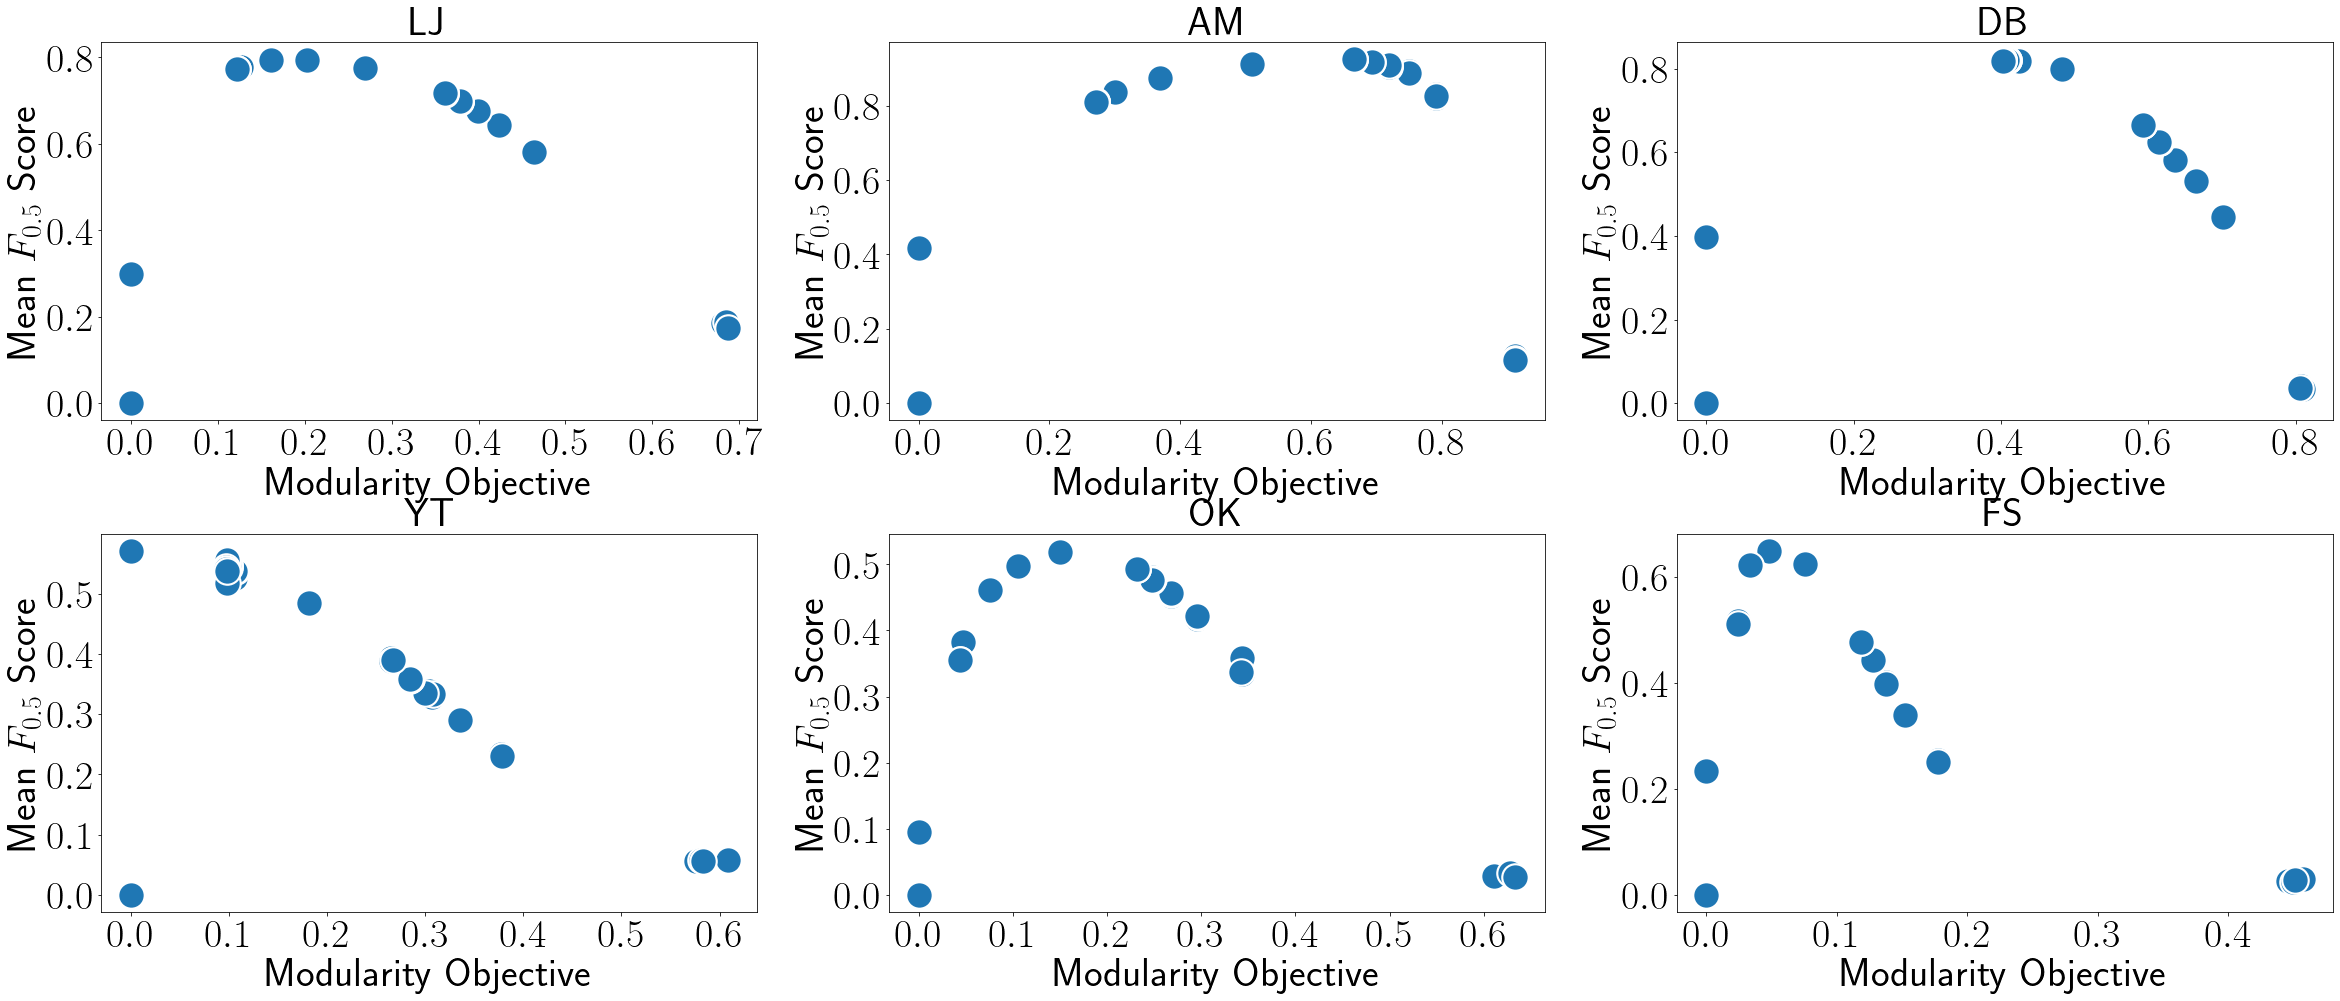

In [345]:
xaxis = 'modularityObjective'
yaxis = "fScore_mean"
plotObjectives(xaxis, yaxis, "Modularity Objective", "Mean $F_{0.5}$ Score")
plt.savefig("../results/objective_mod_f.pdf", bbox_inches='tight')

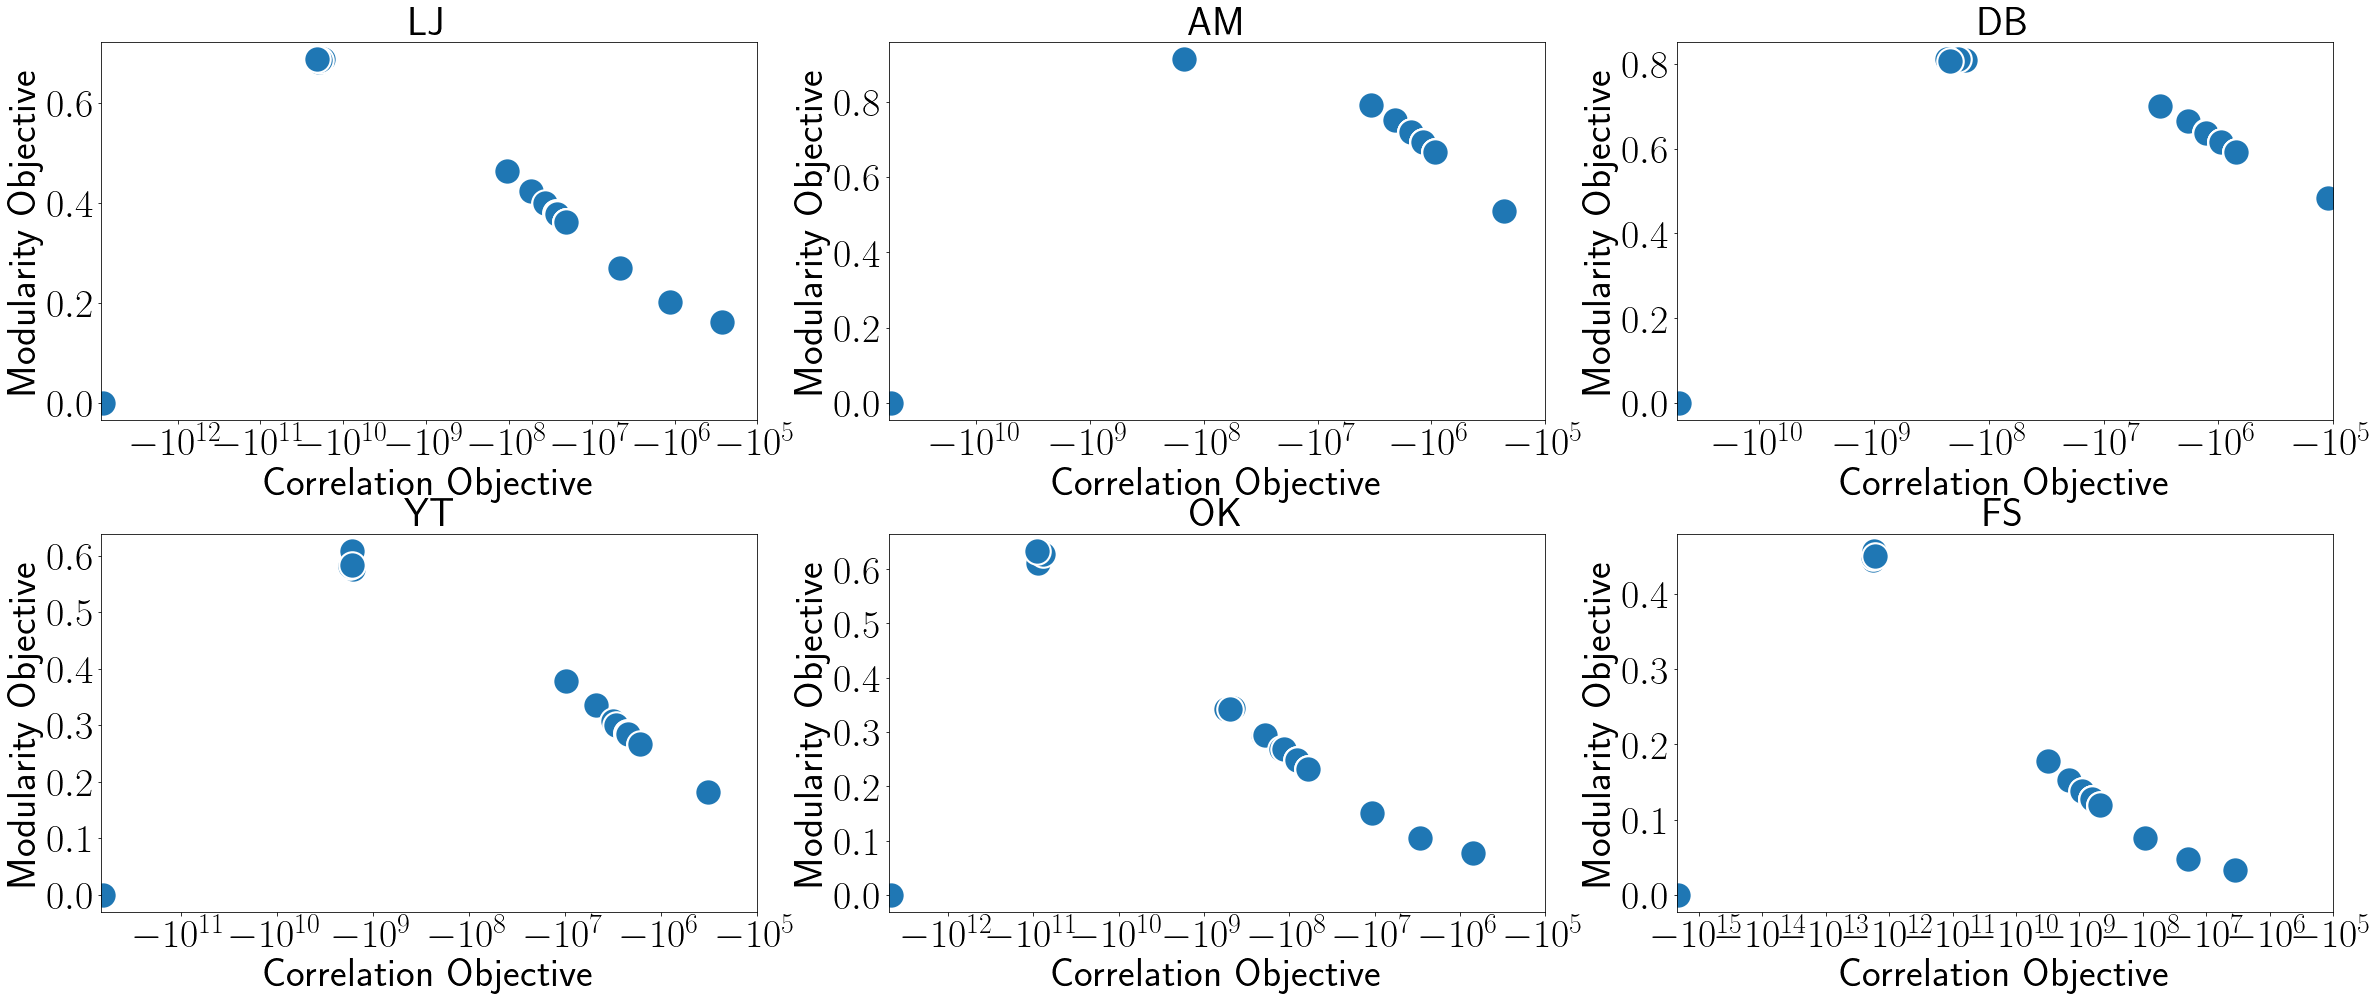

In [346]:
xaxis = 'correlationObjective'
yaxis = 'modularityObjective'
plotObjectives(xaxis, yaxis, "Correlation Objective", "Modularity Objective", )
plt.savefig("../results/objective_corr_mod.pdf", bbox_inches='tight')

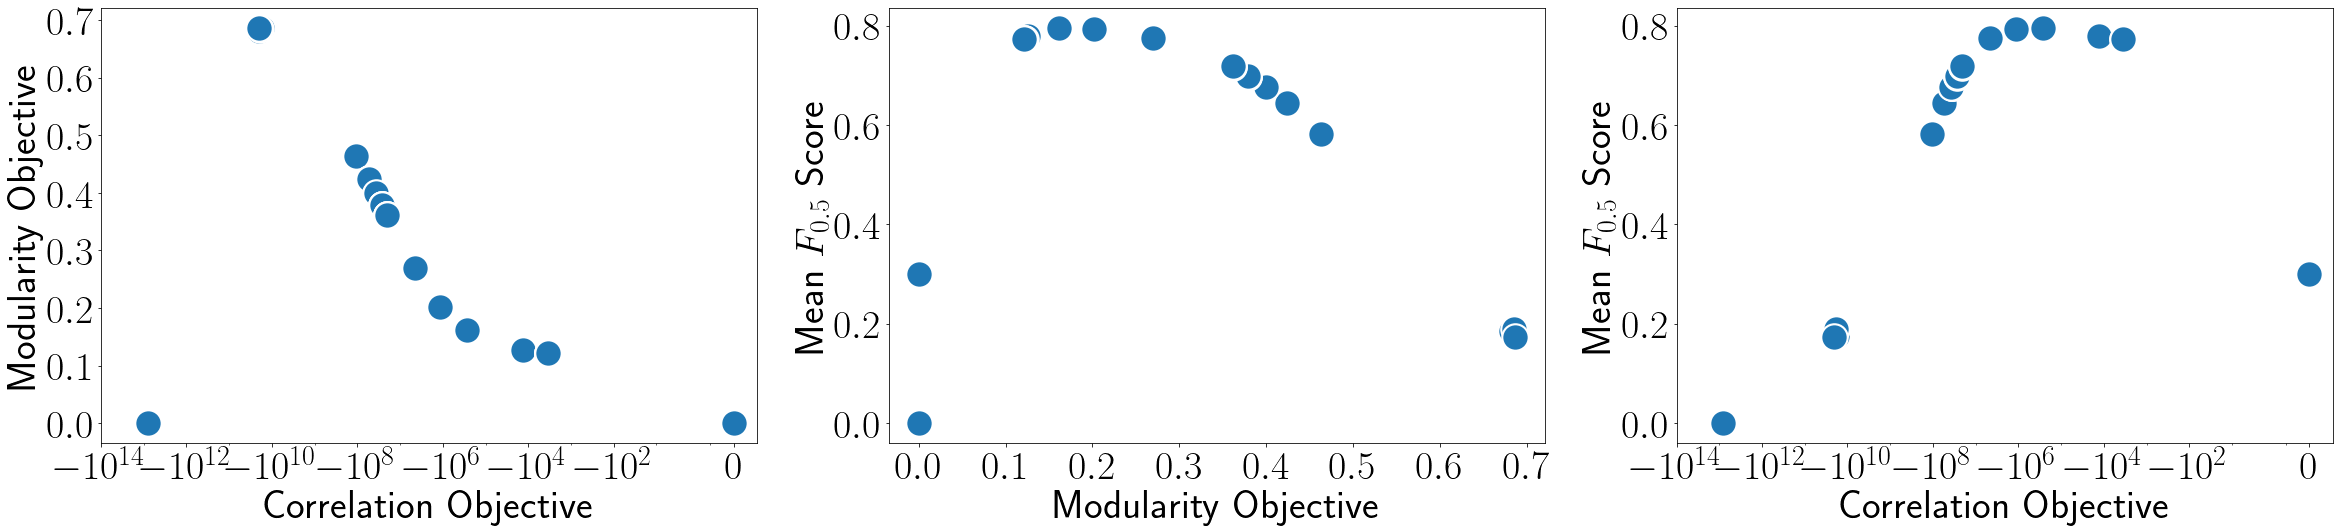

In [358]:

graph = "LJ"

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(40, 8))
df_sub = df_all.loc[graph]

xaxis = 'correlationObjective'
yaxis = 'modularityObjective'
xlabel = "Correlation Objective"
ylabel = "Modularity Objective"
plot_ax(axes[0], xaxis, yaxis, xlabel, ylabel, df_sub, graph)        

xaxis = 'modularityObjective'
yaxis = "fScore_mean"
xlabel = "Modularity Objective"
ylabel = "Mean $F_{0.5}$ Score"
plot_ax(axes[1], xaxis, yaxis, xlabel, ylabel, df_sub, graph)     

xaxis = 'correlationObjective'
yaxis = "fScore_mean"
xlabel = "Correlation Objective"
ylabel = "Mean $F_{0.5}$ Score"
plot_ax(axes[2], xaxis, yaxis, xlabel, ylabel, df_sub, graph)    

for ax in axes:
    ax.set_title("")

plt.savefig("../results/objective_all.pdf", bbox_inches='tight')    